Longueur moyenne des synopsis: 71.5 mots


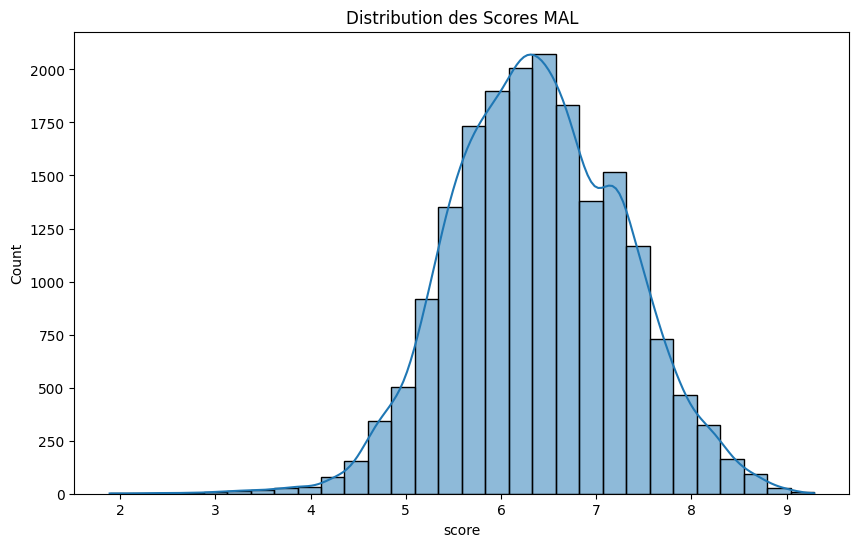

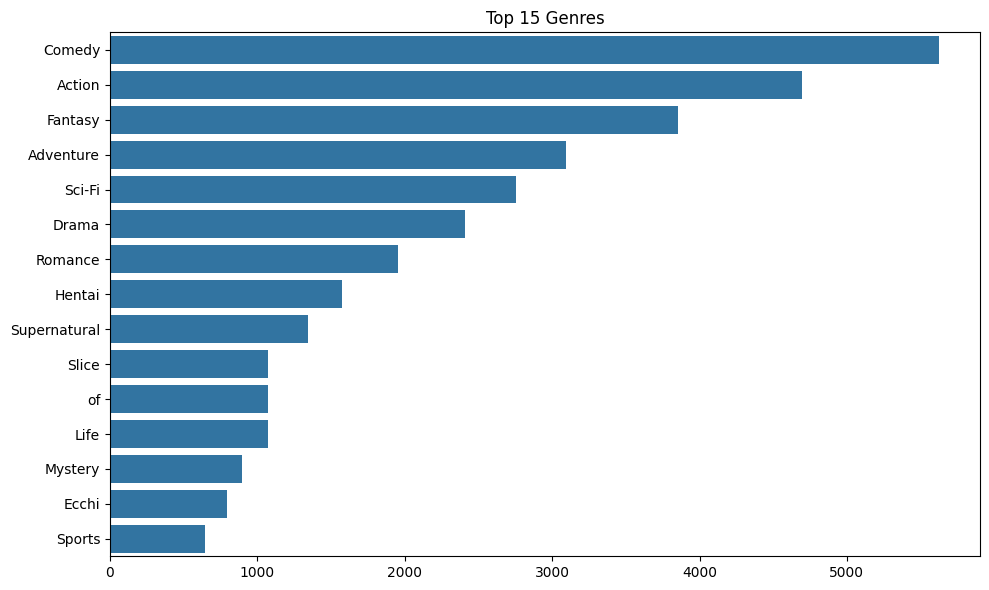

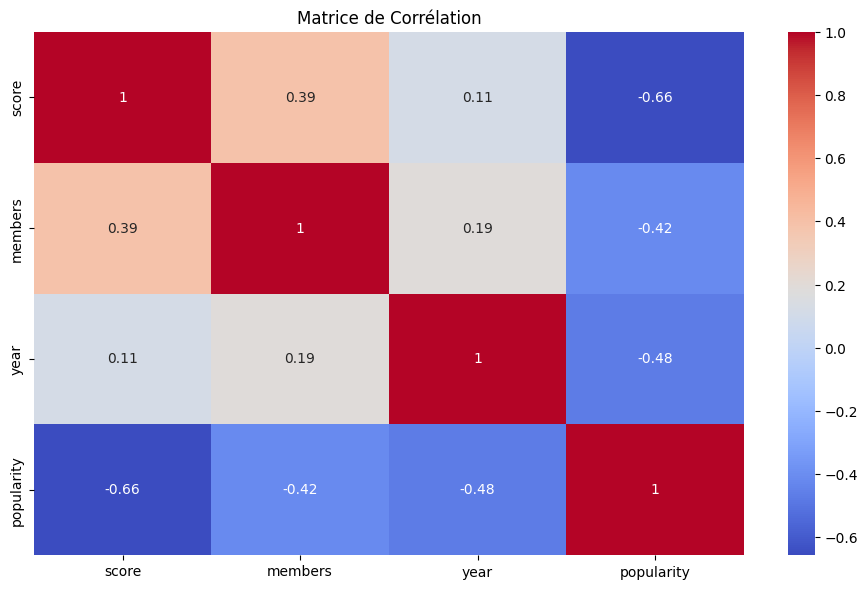

In [ ]:
# notebooks/03_data_exploration.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define configuration variables directly
DATA_DIR = "../data"
PROCESSED_DATA_DIR = f"{DATA_DIR}/processed"
RAW_DATA_DIR = f"{DATA_DIR}/raw"
REPORTS_DIR = "../reports"
FIGURES_DIR = f"{REPORTS_DIR}/figures"

df = pd.read_csv("../data/processed/anime_clean.csv")

# 1. Distribution des scores
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=30, kde=True)
plt.title('Distribution des Scores MAL')
plt.savefig('../reports/figures/score_distribution.png')

# 2. Top genres et thèmes
def plot_top_items(column, title, top_n=15):
    from collections import Counter
    all_items = ' '.join(df[column].fillna('')).split()
    counter = Counter(all_items)
    top_items = counter.most_common(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[count for _, count in top_items], 
                y=[item for item, _ in top_items])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{column}_distribution.png')

plot_top_items('genres', 'Top 15 Genres')
plot_top_items('themes', 'Top 15 Thèmes')

# 3. Corrélations entre features numériques
numeric_features = ['score', 'members', 'year', 'popularity']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.savefig('../reports/figures/correlation_matrix.png')

# 4. Analyse des longueurs de synopsisc
df['synopsis_length'] = df['synopsis'].str.split().str.len()
print(f"Longueur moyenne des synopsis: {df['synopsis_length'].mean():.1f} mots")